# 使用前后入睡时长变化率热力图

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.cm as cm
import pandas as pd

In [8]:

# 定义中文字体，防止乱码
font_path = '../data/SimHei.ttf'  # 替换为实际的字体路径
font_prop = fm.FontProperties(fname=font_path)

In [9]:
# 姓名和相应入睡时长数据
categories = ['陈东升', '费艳冬', '甘颖婷', '刘汪昊', '汤荀', '王瑜', '杨雅兰', '徐悦', '沈发琴', '郑慧', '藕有娣', '韩思洁', '俞志江', '沈士国', '从建明']

# 使用前入睡时长
scores_right =  np.array([90, 30,120,150, 120, 60, 30, 149, 75, 50, 90, 181, 60, 60, 120])
scores_right = np.flip(scores_right)

# 使用后入睡时长
scores_left = np.array([114, 60,23,16,56, 39, 21, 10, 25, 29,  13, 18, 0, 1, 6])
scores_left = np.flip(scores_left)

In [10]:
# 根据使用前-使用后差值重排序
df  = pd.DataFrame()
df['name'] = categories
df['right'] = scores_right
df['left'] = scores_left
df['change'] = df['right']-df['left']
df = df.sort_values(by='change',ascending=False)

categories = df['name'].to_numpy()
scores_right = df['right'].to_numpy()
scores_left = df['left'].to_numpy()

In [11]:
# 计算差值变化率 （（使用后-使用前）/使用前）
difference = (scores_left - scores_right)/scores_right

/home/lwd/anaconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from current font.
  fig.canvas.draw()
/home/lwd/anaconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.draw()


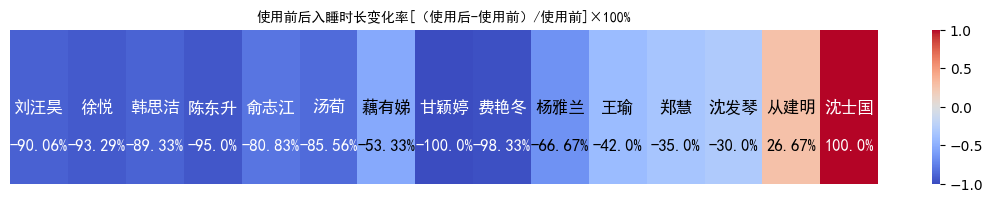

In [12]:
# 创建热力图
plt.figure(figsize=(14, 2))
cmap = plt.get_cmap('coolwarm')
sns.heatmap(difference.reshape(1, -1), annot=False, cmap='coolwarm', fmt=".2f", 
            xticklabels=False, yticklabels=['差值'], cbar=True, vmin=-1, vmax=1)

# 在图上添加姓名和数值
for i in range(len(difference)):
    color_value = (difference[i] - difference.min()) / (difference.max() - difference.min())
    background_color = cmap(color_value)
    r, g, b, _ = background_color
    luminance = 0.2126 * r + 0.7152 * g + 0.0722 * b
    text_color = 'white' if luminance < 0.5 else 'black'

    q = ((difference[i]*100).round(2)).astype(str) + '%'

    plt.text(i + 0.5, 0.5, categories[i], ha='center', va='center', fontsize=12, fontproperties=font_prop, color=text_color)
    plt.text(i + 0.5, 0.8, f"{q}", ha='center', va='bottom', fontsize=12, fontproperties=font_prop, color=text_color)

plt.title('使用前后入睡时长变化率[（使用后-使用前）/使用前]×100%', fontproperties=font_prop, color='black')
plt.xlabel('', fontproperties=font_prop, color='black')
plt.ylabel('', fontproperties=font_prop, color='black')

plt.xticks([])  # 去掉横轴坐标
plt.yticks([])  # 去掉纵轴坐标
plt.savefig("../result/使用前后入睡时长变化率热力图",dpi=1500)
plt.show()